In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate  import solve_ivp

In [83]:
r=0.1

sigma=1




def ODE(W, y):
    F,V = y

    
    F_update = V
    
    if V<0:
        c=(V/2)**2
    else:
        c = 0
    
    a_orig = 2/5 + 4/25 *V + 2*F+2*c-2*V*W +2*V*np.sqrt(c)
    
    a = a_orig * (a_orig > 0) + 0*(a_orig <=0)
    

    upper = F - a + c - V*(W-np.sqrt(c)+a**2/2 + 2/5 * a)
    lower = r*(a+2/5)**2 * sigma**2/2
    
    V_update = upper/lower
    
    return [F_update, V_update]



sol2 = solve_ivp(ODE, t_span=(0, 1), y0=[
    0, 2.5], method="DOP853", max_step=0.001)


1.0

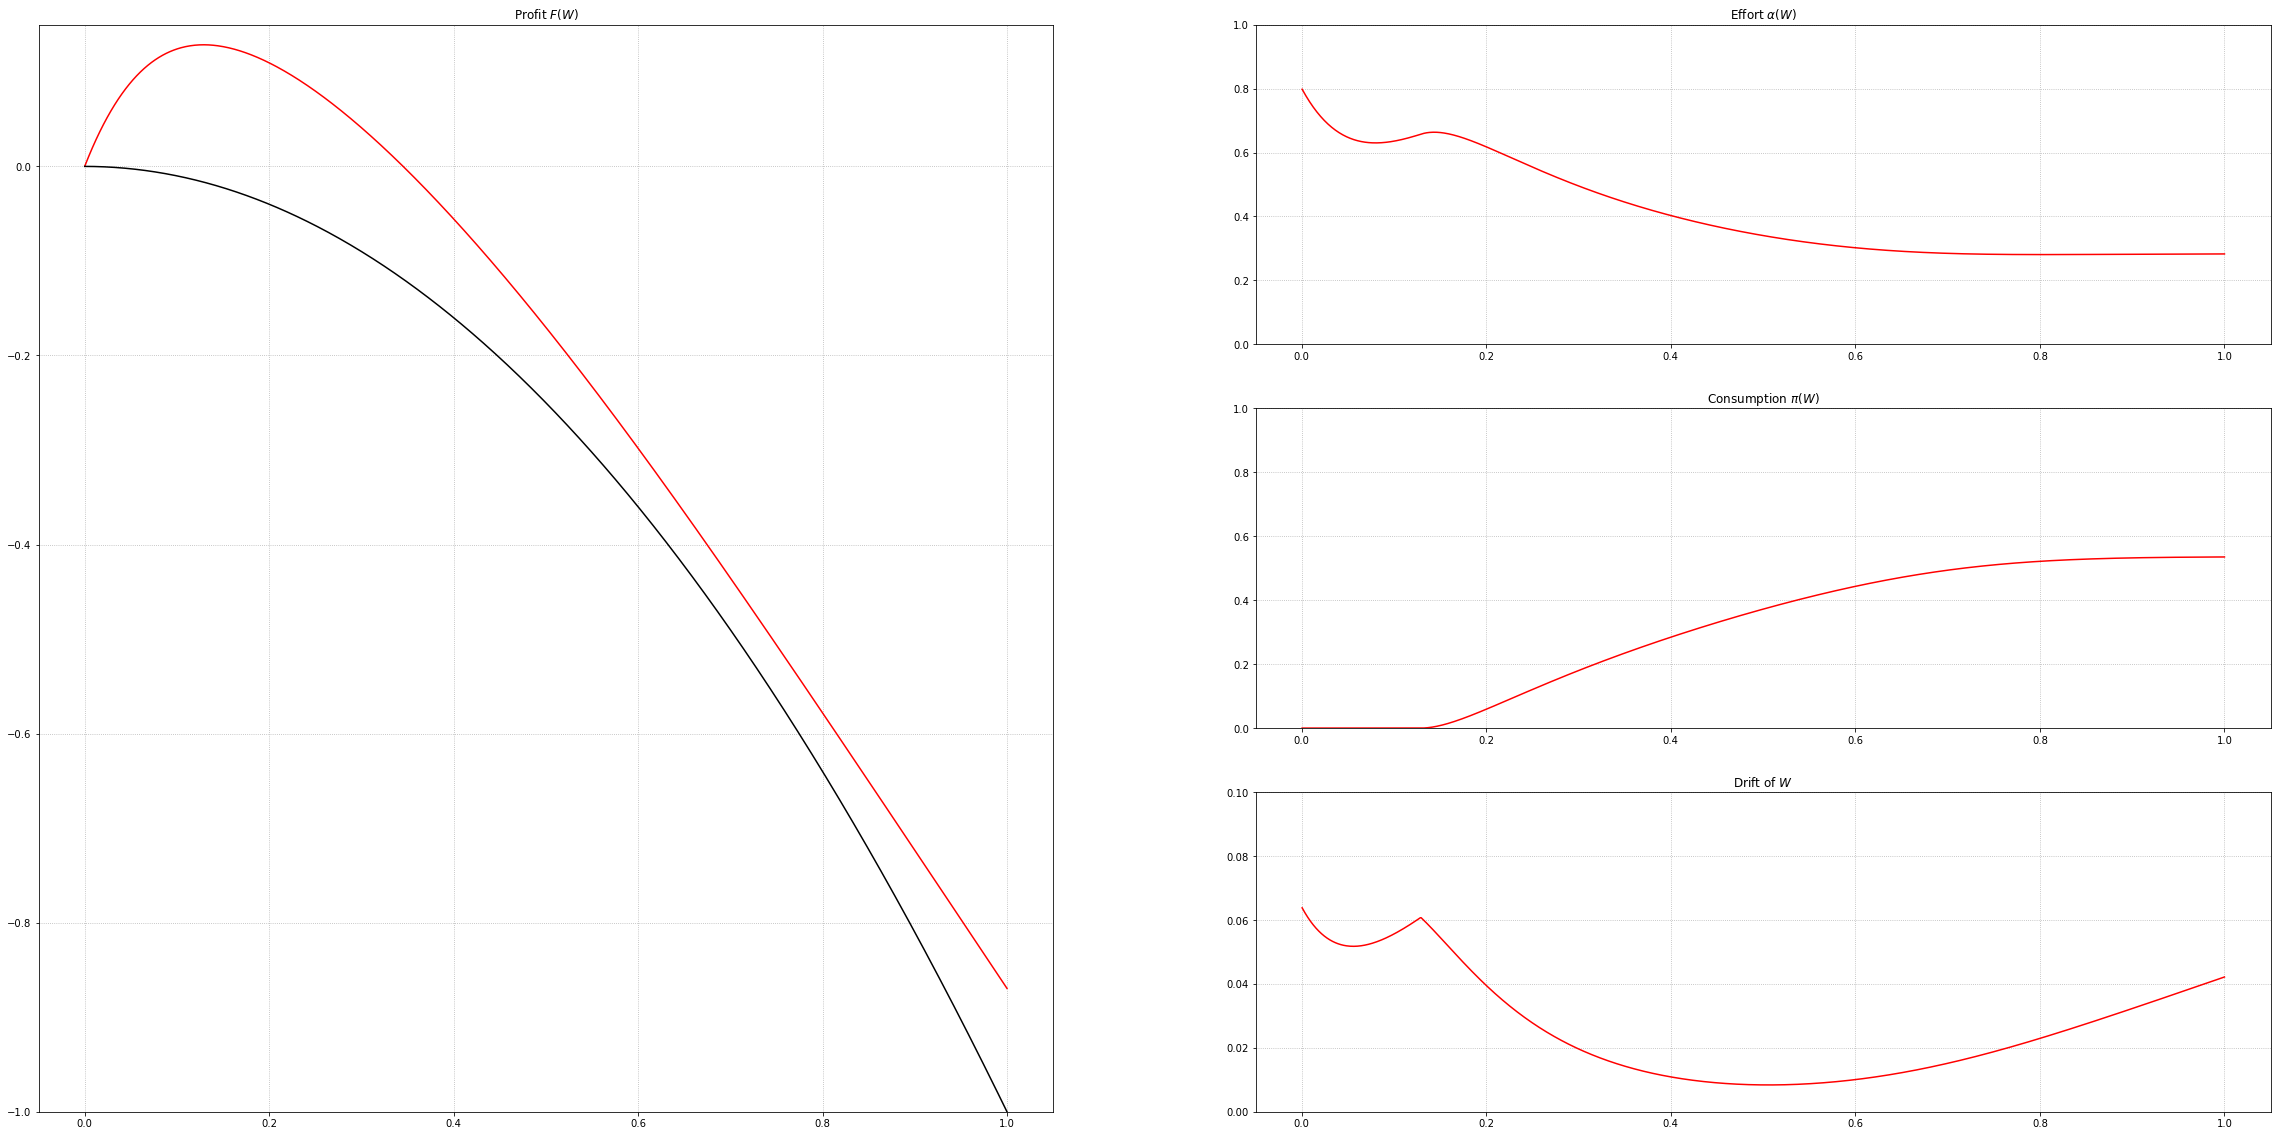

In [82]:
X_plot = sol2.t[sol2.y[0] > -sol2.t**2]
fitted_F = sol2.y[0][sol2.y[0] > -sol2.t**2]
fitted_V = sol2.y[1][sol2.y[0] > -sol2.t**2]


c_orig = (fitted_V/2)**2 * (fitted_V < 0) 

c = c_orig

a_orig = 2/5 + 4/25 * fitted_V + 2*fitted_F + \
    2*c-2*fitted_V*X_plot + 2*fitted_V*np.sqrt(c)

a = a_orig * (a_orig > 0) + 0*(a_orig <= 0)


fitted_a = a
fitted_c = c
B_W = r*(X_plot-fitted_c**(1/2)+fitted_a**2/2+2*fitted_a/5)
fitted_drift = B_W

figwidth = 10

fig, axs = plt.subplot_mosaic(

    [["left column", "right top"],
     ["left column", "right mid"],
        ["left column", "right down"]], figsize=(4 * figwidth, 2 * figwidth)

)


axs["left column"].plot(X_plot, fitted_F, color='red')
axs["left column"].set_ylim(-1, 0.15)
axs["left column"].plot(sol2.t, -sol2.t**2, color='black')
axs["left column"].set_title("Profit $F(W)$")
axs["left column"].grid(linestyle=':')

axs["right top"].plot(X_plot, fitted_a, color='red')
axs["right top"].set_ylim(0, 1)
axs["right top"].set_title("Effort $\\alpha(W)$")
axs["right top"].grid(linestyle=':')

axs["right mid"].plot(X_plot, fitted_c, color='red')
axs["right mid"].set_ylim(0, 1)
axs["right mid"].set_title("Consumption $\\pi(W)$")
axs["right mid"].grid(linestyle=':')

axs["right down"].plot(X_plot, fitted_drift, color='red')
axs["right down"].set_ylim(0, 0.1)
axs["right down"].set_title("Drift of $W$")
axs["right down"].grid(linestyle=':')

sol2.t[sol2.y[0] > -sol2.t**2].max()
